In [2]:
# read image from './COVID-19_Radiography_Dataset/Normal/images/Normal-1.png'

# import the necessary packages
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [3]:
# add sharpen to the image
def sharpen(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

In [6]:
# read images from the folder lung_opacity

lung_opacity_length =len(os.listdir('./COVID-19_Radiography_Dataset/Lung_Opacity/images/'))
lung_opacity = []

for i in range(1, lung_opacity_length):
    img = cv2.imread('./COVID-19_Radiography_Dataset/Lung_Opacity/images/Lung_Opacity-'+str(i)+'.png')
    lung_opacity.append(img)

sharpen_lung_opacity = []

for i in range(0, lung_opacity_length-1):
    img = sharpen(lung_opacity[i], 3)
    sharpen_lung_opacity.append(img)

# save the sharpen images to the folder sharpen_images
for i in range(0, lung_opacity_length-1):
    cv2.imwrite('./COVID-19_Radiography_Dataset/Lung_Opacity/sharpen_images/Lung_Opacity-'+str(i)+'.png', sharpen_lung_opacity[i])



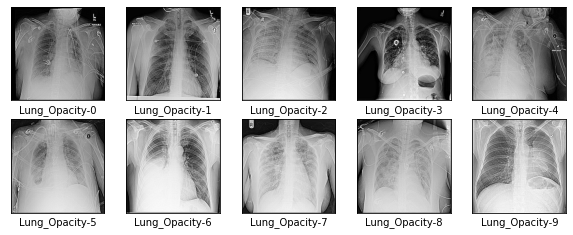

In [7]:
# read sharpen images from the folder sharpen_images of lung_opacity
lung_opacity_sharpen_length =len(os.listdir('./COVID-19_Radiography_Dataset/Lung_Opacity/sharpen_images/'))
lung_opacity_sharpen = []

for i in range(1, lung_opacity_sharpen_length):
    img = cv2.imread('./COVID-19_Radiography_Dataset/Lung_Opacity/sharpen_images/Lung_Opacity-'+str(i)+'.png')
    lung_opacity_sharpen.append(img)

# display the 10 sharpen images
plt.figure(figsize=(10,10))
for i in range(0, 10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(lung_opacity_sharpen[i], cmap=plt.cm.binary)
    plt.xlabel('Lung_Opacity-'+str(i))
plt.show()



In [13]:
# # function to check if the input image is a lung image similar to the images in the lung_opacity folder
# def is_lung_image(img):
#     # convert the image to grayscale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     # blur the image slightly
#     gray = cv2.GaussianBlur(gray, (5, 5), 0)
#     # threshold the image, then perform a series of erosions +
#     # dilations to remove any small regions of noise
#     thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
#     thresh = cv2.erode(thresh, None, iterations=2)
#     thresh = cv2.dilate(thresh, None, iterations=2)
#     # find contours in thresholded image, then grab the largest
#     # one
#     cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
#         cv2.CHAIN_APPROX_SIMPLE)
#     cnts = cnts[0] if len(cnts) == 2 else cnts[1]
#     c = max(cnts, key=cv2.contourArea)
#     # determine the most extreme points along the contour
#     extLeft = tuple(c[c[:, :, 0].argmin()][0])
#     extRight = tuple(c[c[:, :, 0].argmax()][0])
#     extTop = tuple(c[c[:, :, 1].argmin()][0])
#     extBot = tuple(c[c[:, :, 1].argmax()][0])
#     # draw the outline of the object, then draw each of the
#     # extreme points, where the left-most is red, right-most
#     # is green, top-most is blue, and bottom-most is teal
#     cv2.drawContours(img, [c], -1, (0, 255, 255), 2)
#     cv2.circle(img, extLeft, 8, (0, 0, 255), -1)
#     cv2.circle(img, extRight, 8, (0, 255, 0), -1)
#     cv2.circle(img, extTop, 8, (255, 0, 0), -1)
#     cv2.circle(img, extBot, 8, (255, 255, 0), -1)
#     # show the output image
#     cv2.imshow("Image", img)
#     cv2.waitKey(3000)
#     cv2.destroyAllWindows()
#     # check if the image is a lung image
#     if extLeft[0] < 100 and extRight[0] > 200 and extTop[1] < 100 and extBot[1] > 200:
#         return True
#     else:
#         return False

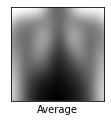

In [15]:
# get the a average image of the lung_opacity folder

# grayscale the images in the lung_opacity folder
lung_opacity_grayscale = []
for i in range(0, lung_opacity_length-1):
    img = cv2.cvtColor(lung_opacity[i], cv2.COLOR_BGR2GRAY)
    lung_opacity_grayscale.append(img)

# get the average image
lung_opacity_average = np.mean(lung_opacity_grayscale, axis=0)

# display the average image
plt.figure(figsize=(10,10))
plt.subplot(5,5,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(lung_opacity_average, cmap=plt.cm.binary)
plt.xlabel('Average')
plt.show()



In [26]:
# check if the input image is similar to lung_opacity_average using standard deviation
def is_lung_image(img):
    # convert the image to grayscale
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # get the standard deviation of the input image and the average image
    std = np.std(img)
    std_average = np.std(lung_opacity_average)
    # check if the input image is similar to the average image
    if std > std_average:
        return True
    else:
        return False

In [33]:
test_image = cv2.imread('./test6.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
print(is_lung_image(test_image))

True
